In [1]:
# **Retail Customer Churn Analysis – Exploratory Data Analysis (EDA)**

#This notebook performs a complete Exploratory Data Analysis (EDA) on a retail customer churn dataset.



#Dataset Used: `data/raw/customer_churn.csv`




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

RAW_PATH = "../data/raw/customer_churn.csv"  # adjust if running inside root


In [3]:
df = pd.read_csv(RAW_PATH)
df.head()


,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [5]:
df.describe(include="all")


,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
count,7044,7044,7044.000000,7044,7044,7044.000000,7044,7044,7044,7044,...,7044,7044,7044,7044,7044,7044,7044,7044.000000,7044,7044
unique,7044,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4934,NaN,6361,3390,3096,3499,...,3096,3474,2811,2786,3876,4172,2366,NaN,11,5175
mean,NaN,NaN,0.162124,NaN,NaN,32.366695,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.756736,NaN,NaN
std,NaN,NaN,0.368590,NaN,NaN,24.560582,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090786,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


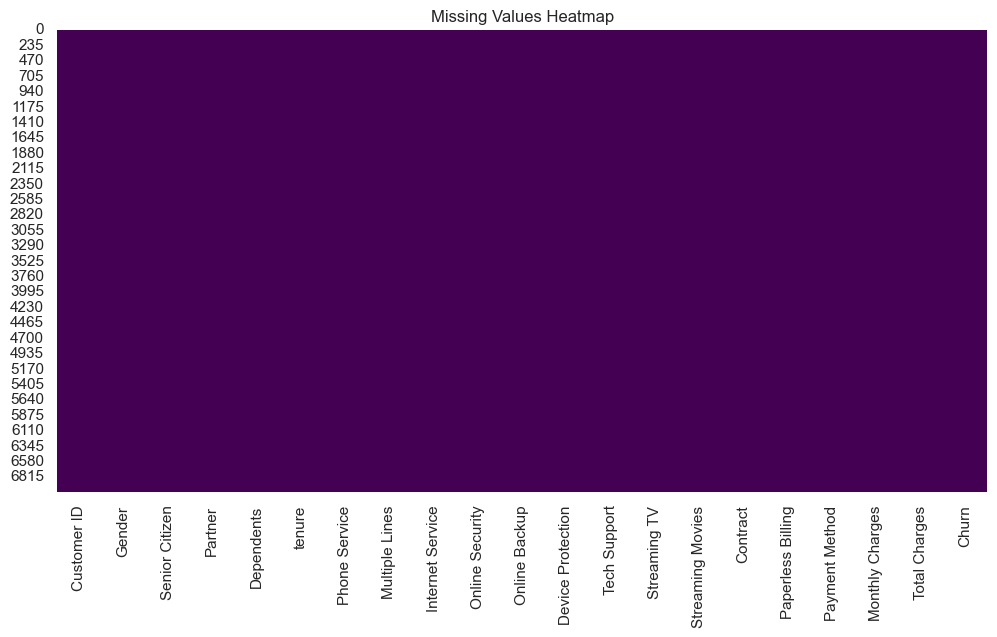

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [7]:
df.isnull().sum().sort_values(ascending=False)


Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1144223979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


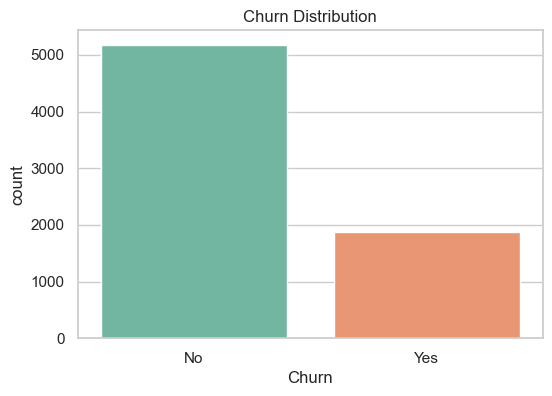

Churn
No     73.46678
Yes    26.53322
Name: proportion, dtype: float64

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

df["Churn"].value_counts(normalize=True) * 100


In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols


(['Senior Citizen', 'tenure', 'Monthly Charges'],
 ['Customer ID',
  'Gender',
  'Partner',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Total Charges',
  'Churn'])

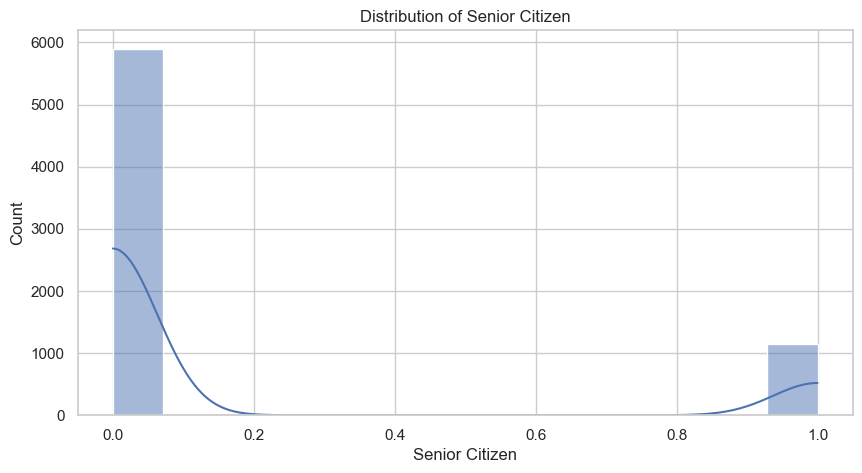

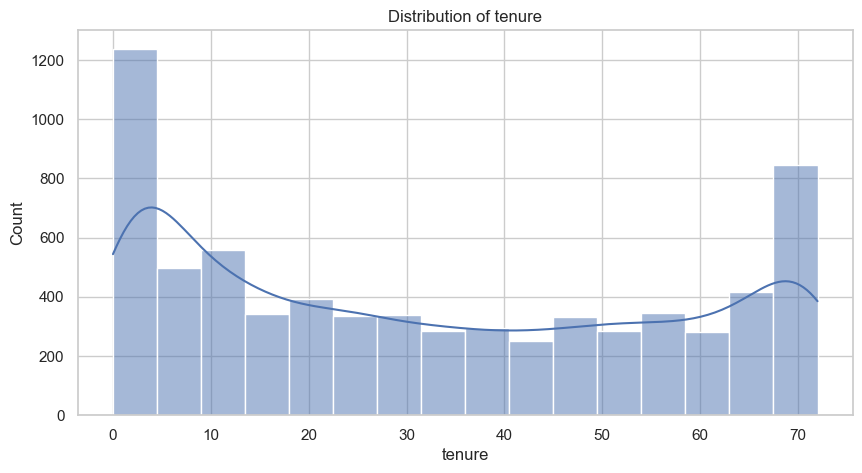

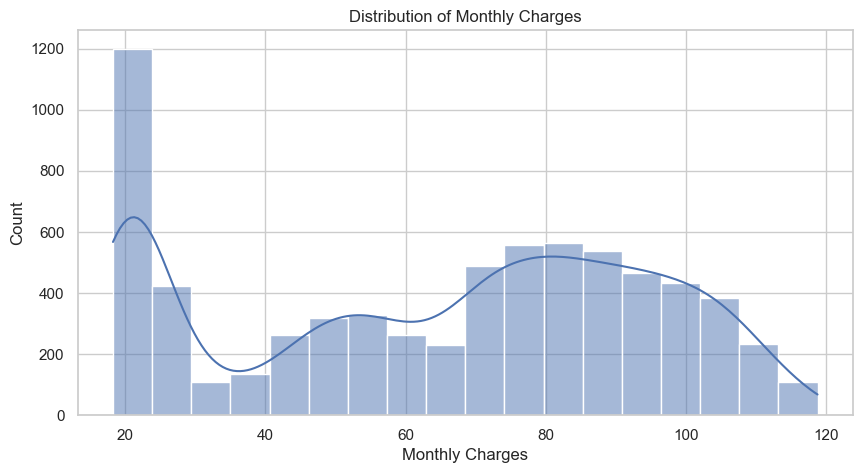

In [10]:
for col in num_cols:
    if col != "CustomerID":
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()


C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


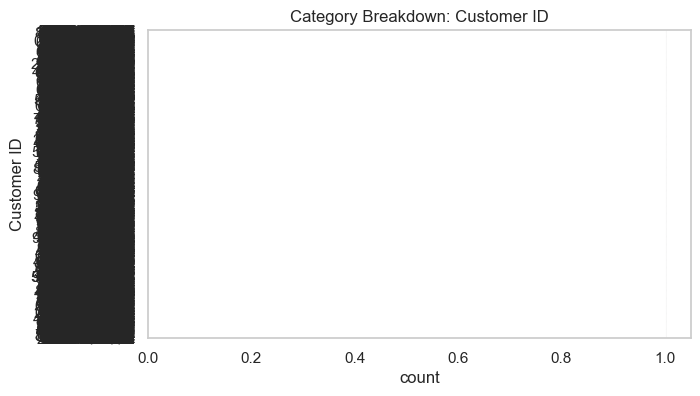

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


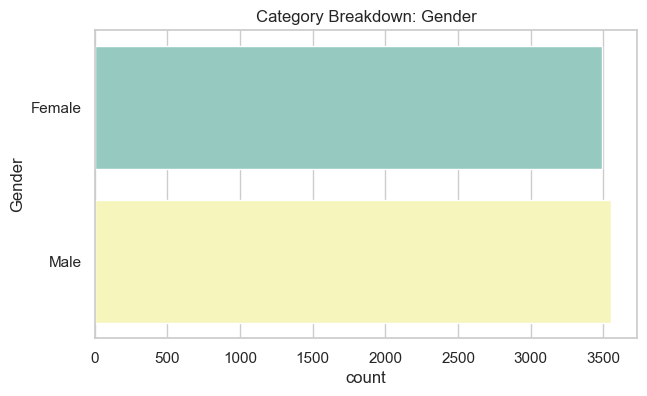

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


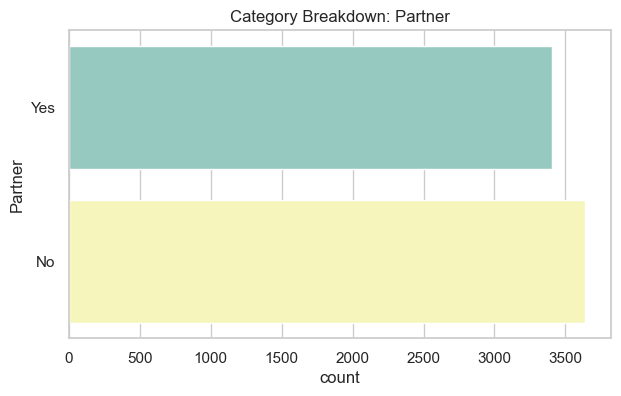

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


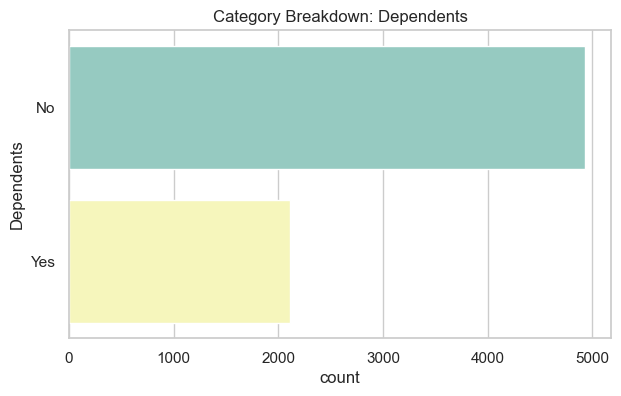

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


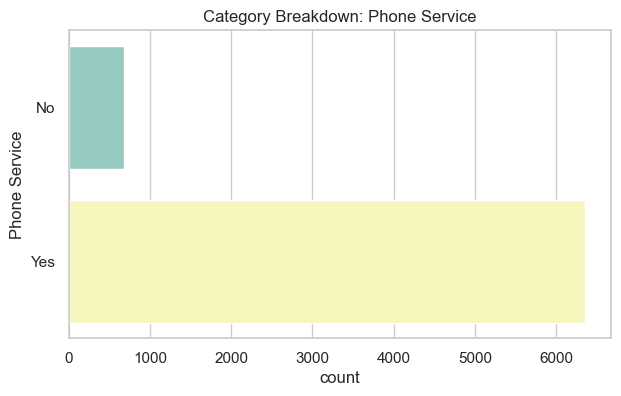

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


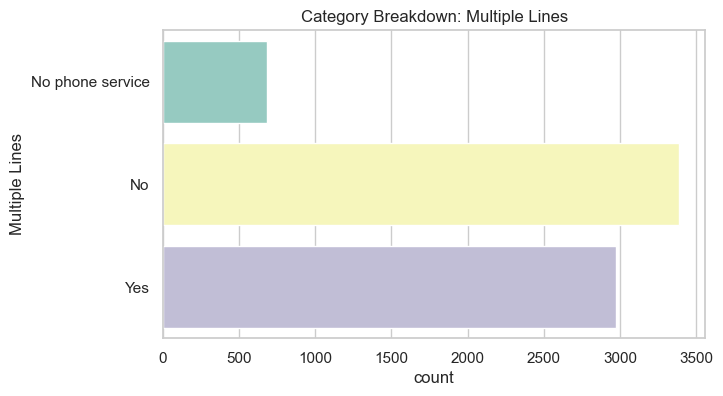

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


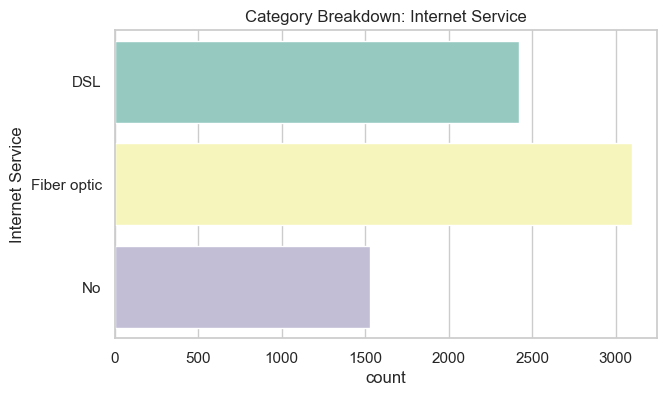

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


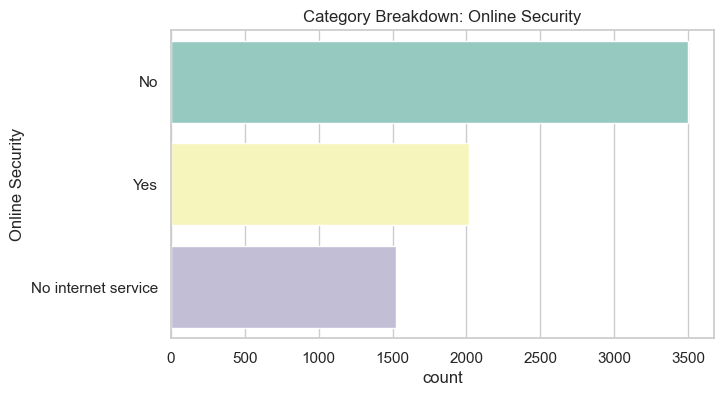

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


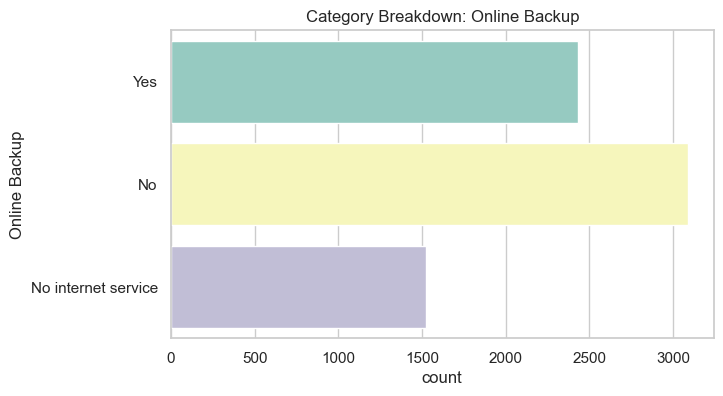

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


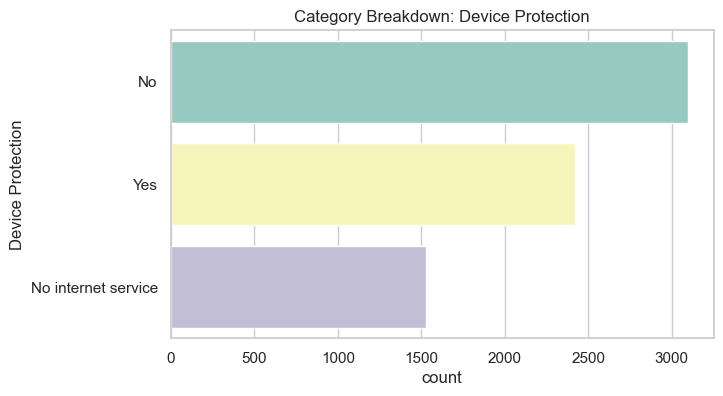

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


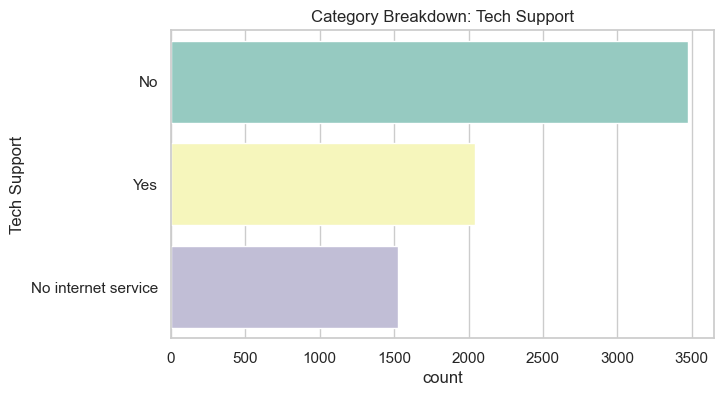

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


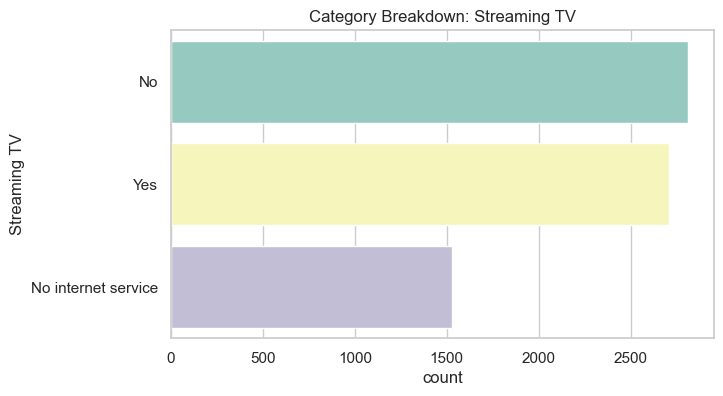

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


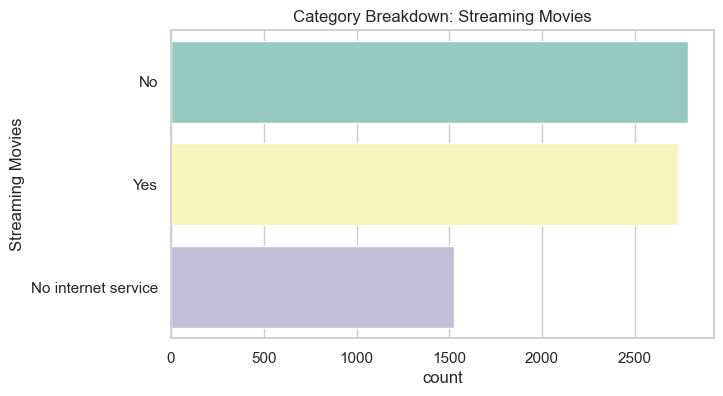

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


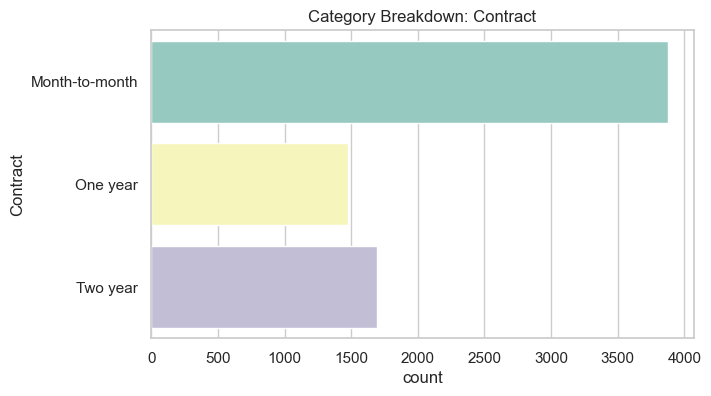

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


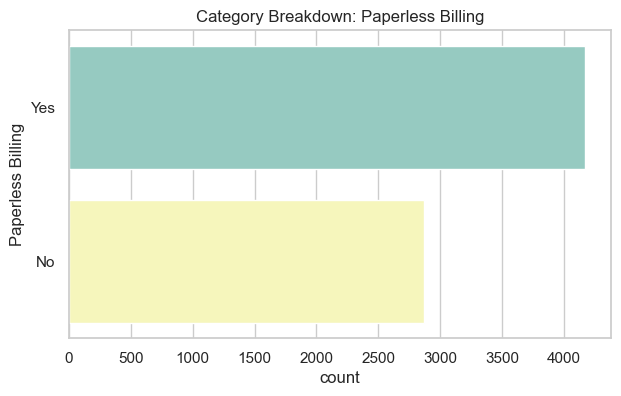

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


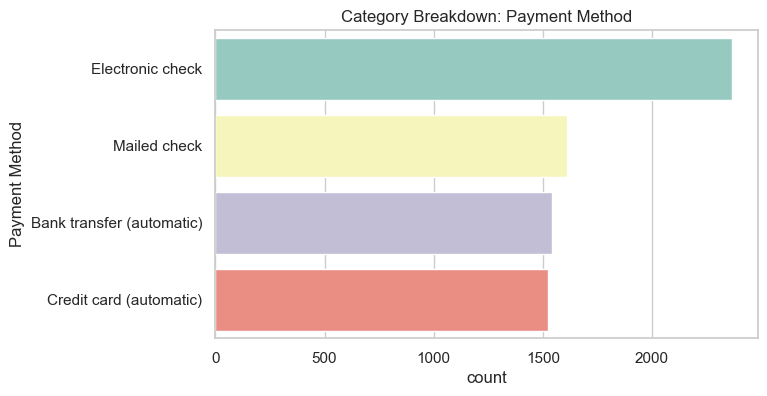

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


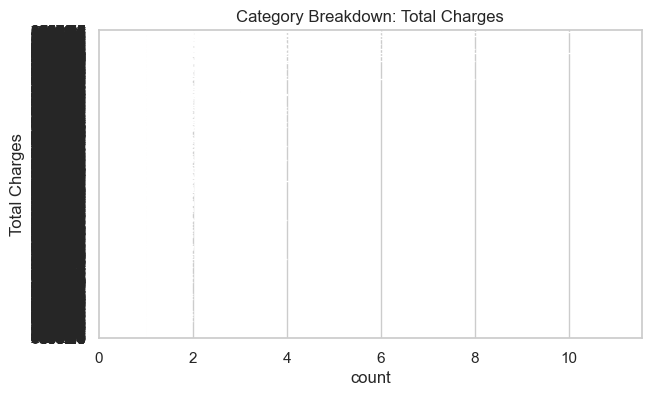

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\2229011115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set3")


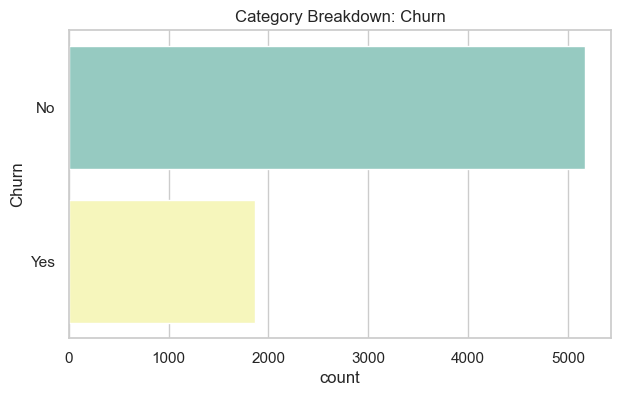

In [12]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(y=col, data=df, palette="Set3")
    plt.title(f"Category Breakdown: {col}")
    plt.show()


C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


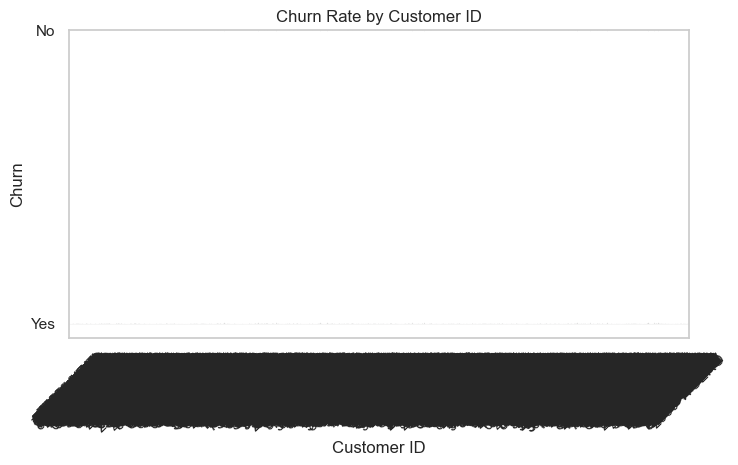

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


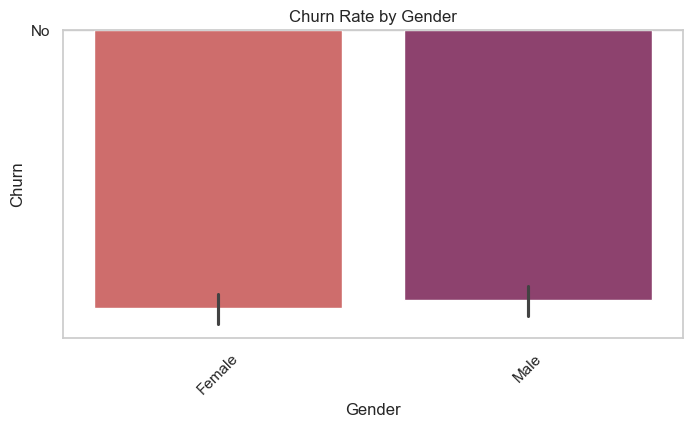

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


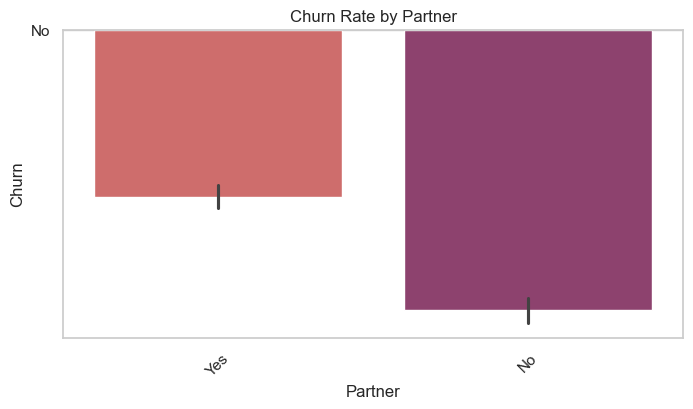

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


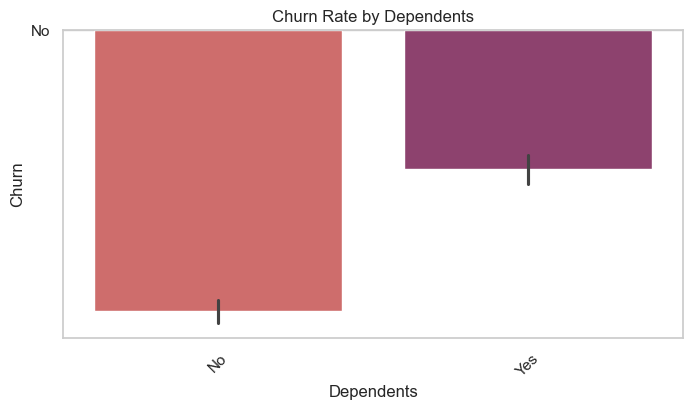

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


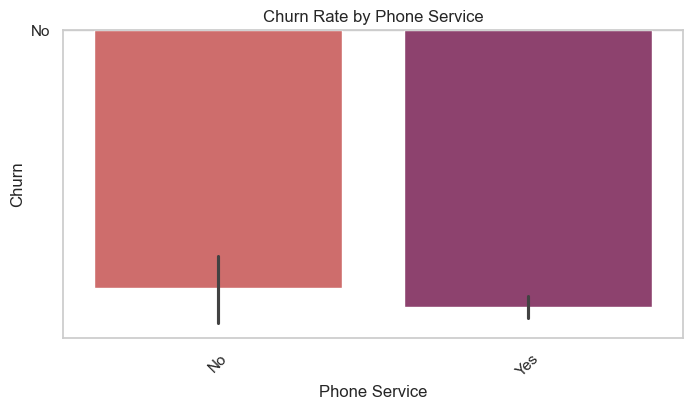

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


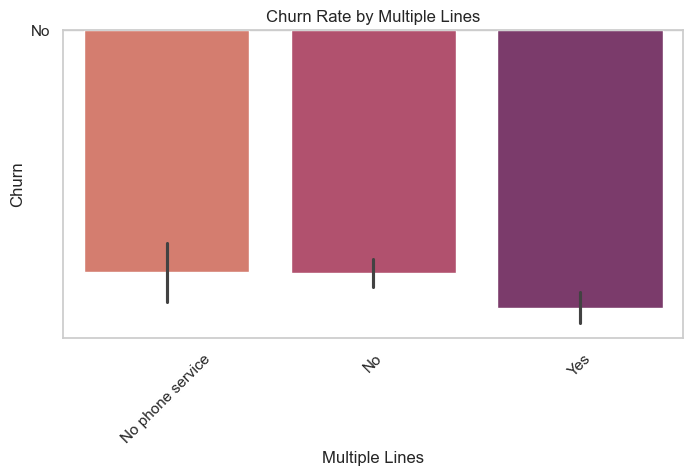

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


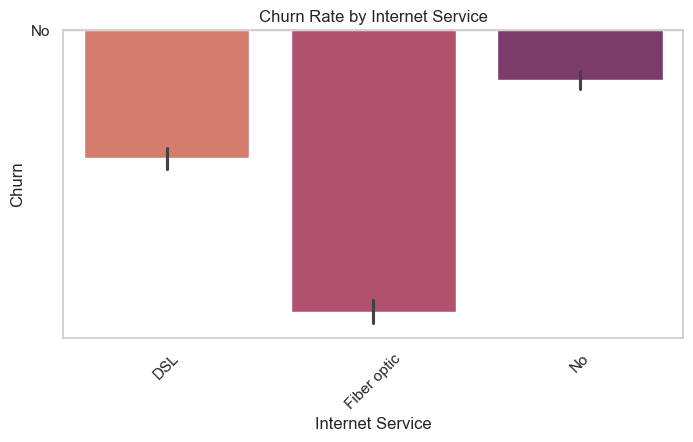

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


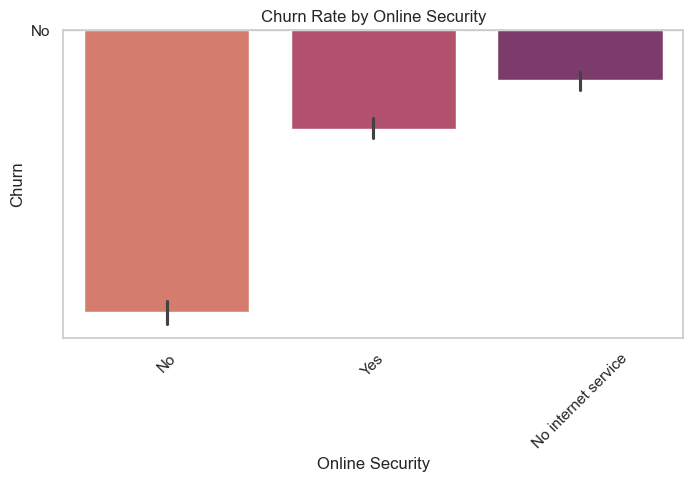

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


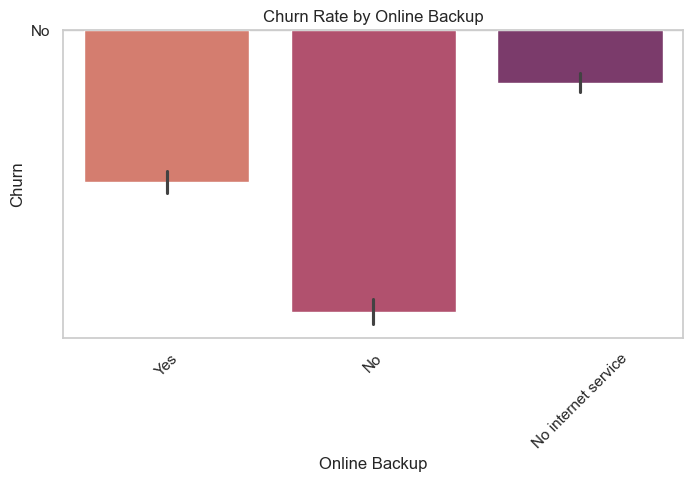

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


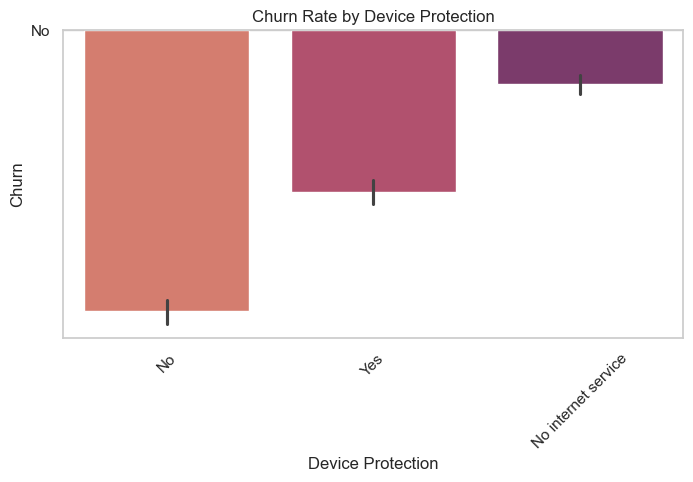

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


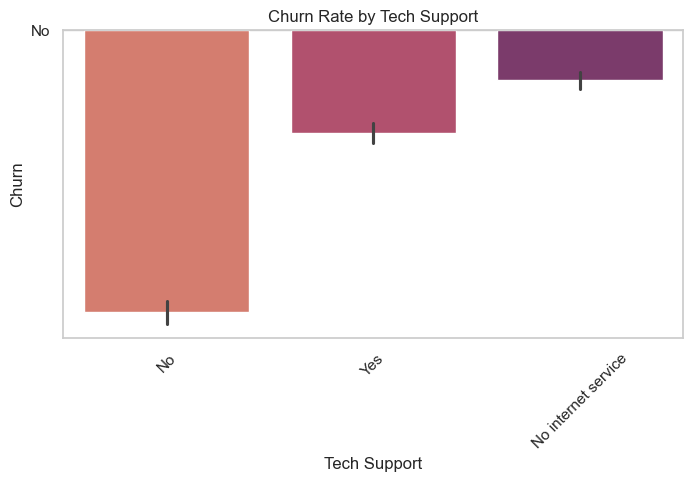

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


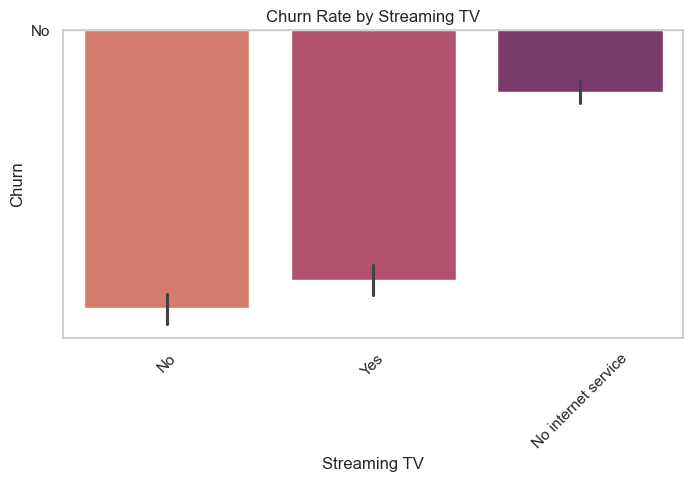

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


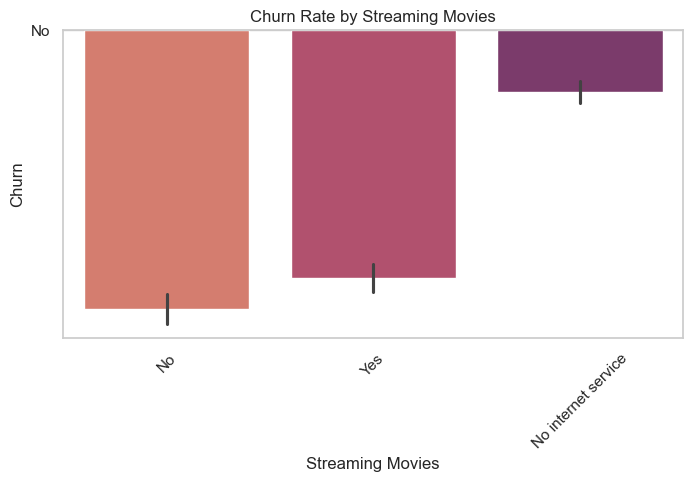

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


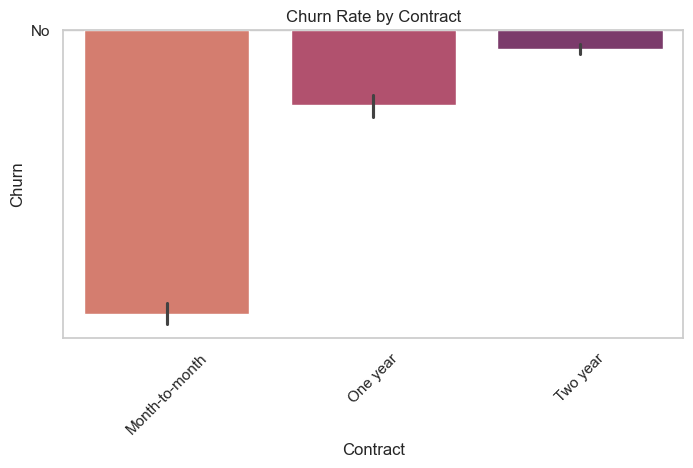

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


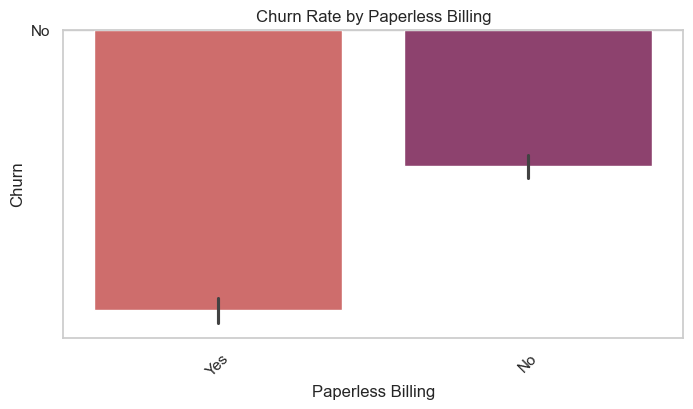

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


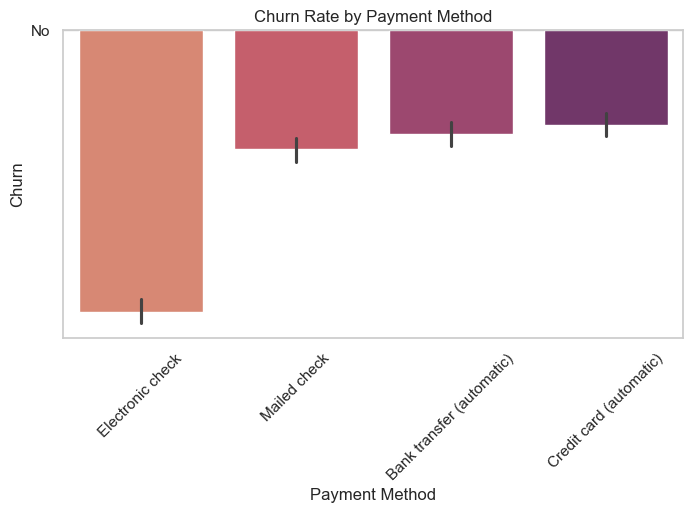

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17756\1103603200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")


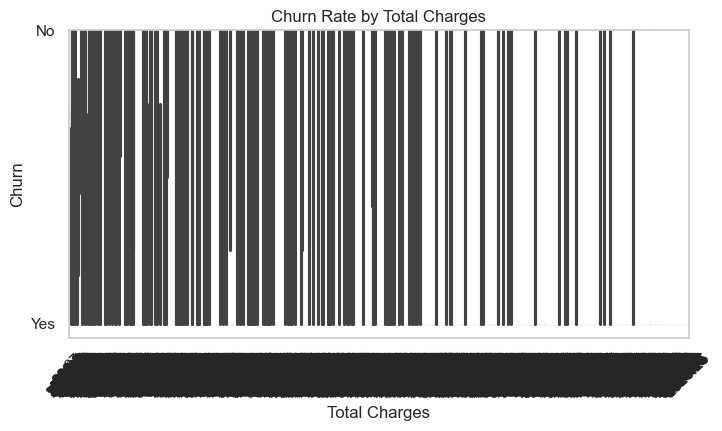

In [13]:
for col in cat_cols:
    if col != "Churn":
        plt.figure(figsize=(8,4))
        sns.barplot(x=col, y="Churn", data=df, estimator="mean", palette="flare")
        plt.xticks(rotation=45)
        plt.title(f"Churn Rate by {col}")
        plt.show()


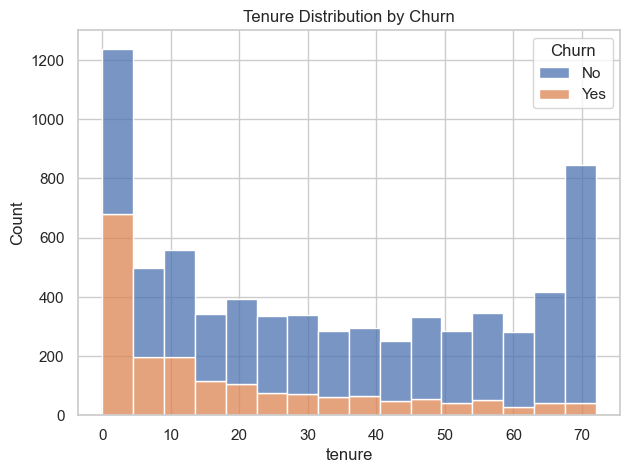

In [16]:
# Automatically detect tenure column
tenure_col = [c for c in df.columns if "tenure" in c.lower()]

if len(tenure_col) == 0:
    raise ValueError("No tenure column found in dataset")
else:
    tenure_col = tenure_col[0]

plt.figure(figsize=(7,5))
sns.histplot(data=df, x=tenure_col, hue="Churn", multiple="stack")
plt.title("Tenure Distribution by Churn")
plt.show()


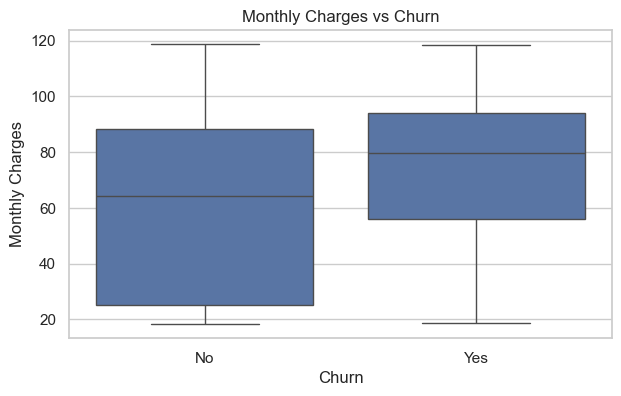

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Churn", y="Monthly Charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


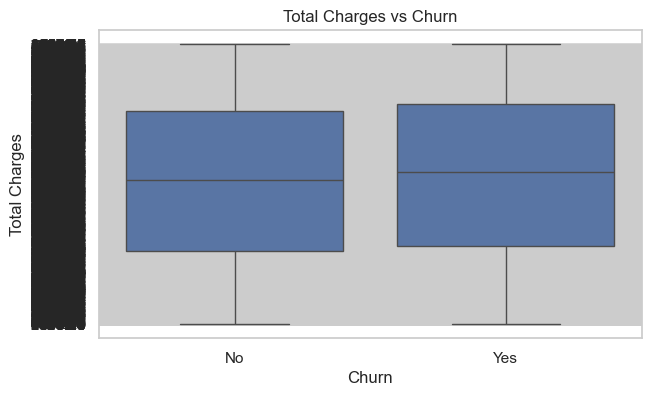

In [20]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Churn", y="Total Charges", data=df)
plt.title("Total Charges vs Churn")
plt.show()


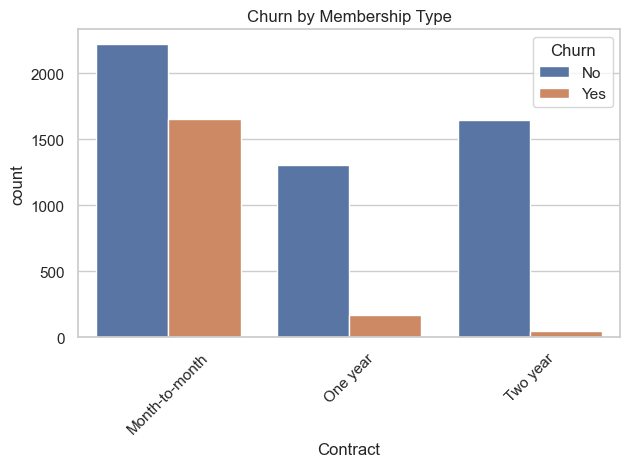

In [22]:
# Auto-detect membership / plan column
membership_col = [
    c for c in df.columns
    if any(k in c.lower() for k in ["member", "plan", "subscription", "contract"])
]

if len(membership_col) == 0:
    raise ValueError("Membership/Plan column not found")
else:
    membership_col = membership_col[0]

plt.figure(figsize=(7,4))
sns.countplot(
    x=membership_col,
    hue="Churn",
    data=df
)
plt.title("Churn by Membership Type")
plt.xticks(rotation=45)
plt.show()


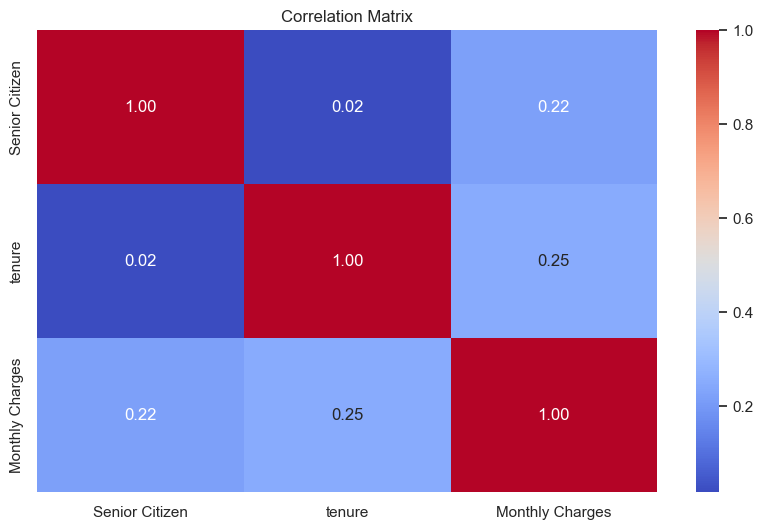

In [23]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


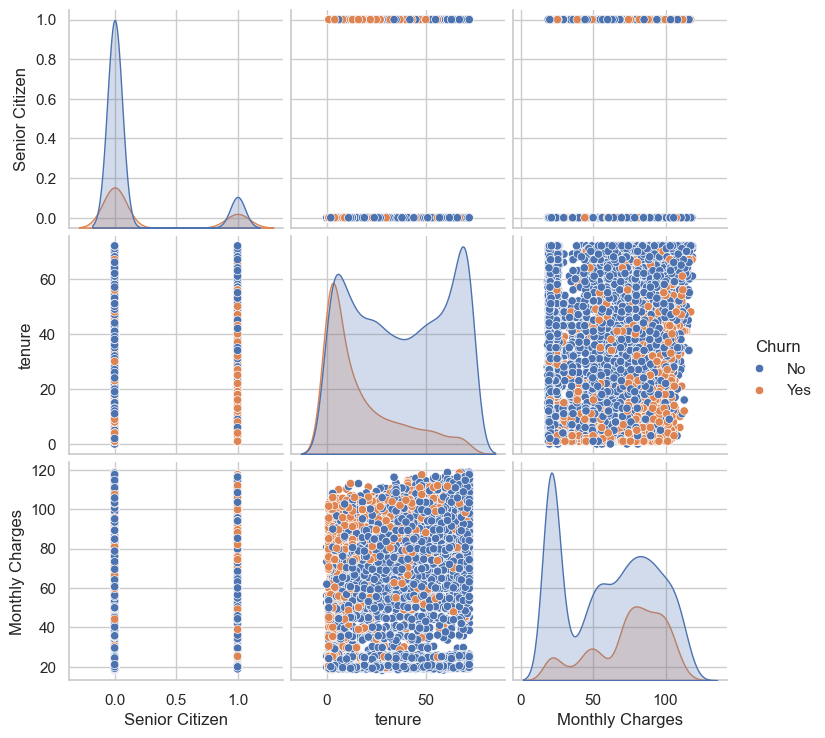

In [24]:
sns.pairplot(df[num_cols + ["Churn"]], hue="Churn")
